In [1]:
#Digit Recognition

In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


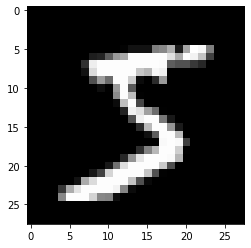

5


In [4]:
## Looking at a sample
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [7]:
#Preprocessing the Data
>We need to shape the pictures in that way, that the models expects it.
The first number is the number of the pictures we have, the second one is the shape of the image, so in our case it is 28. The last number indicates, that it is a greyscale picture.

SyntaxError: invalid syntax (<ipython-input-7-b844b18cbc5a>, line 2)

In [8]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [9]:
## making the correct shape for the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [12]:
###Encoding
> we need this, to get the correct number back, which we recognized. So instead of printing out, that it is number 5, we have an array, where each place means a number. When there is a one, than the field is the predicted number. In our case, the array will look like this [0,0,0,0,0,1,0,0,0,0] 

SyntaxError: invalid syntax (<ipython-input-12-4f3fa87385b1>, line 2)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
# Building the model

In [15]:
## Model
model = Sequential()

## Layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Adding the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [16]:
> We will use a Sequential Model, because that is the easiest way to build a model in Keras. It is going to be build layer by layer. 

SyntaxError: invalid syntax (<ipython-input-16-8e8e45dcb4b6>, line 1)

In [17]:
## Compiling the model

In [18]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
## train the model

In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 47s 25ms/step - loss: 1.9687 - accuracy: 0.6625 - val_loss: 0.1053 - val_accuracy: 0.9685
Epoch 2/3
1875/1875 [==============================] - 55s 30ms/step - loss: 0.2853 - accuracy: 0.9151 - val_loss: 0.0906 - val_accuracy: 0.9713
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2156 - accuracy: 0.9359 - val_loss: 0.0771 - val_accuracy: 0.9753


In [21]:
### We achieved a great accuracy with over 97%!

In [22]:
## Testing

Prediction (Softmax) from the neural network:

 [[9.9989212e-01 1.6386188e-07 5.5602900e-06 6.3315371e-09 3.3692763e-07
  8.8783466e-08 9.4727744e-05 2.8604918e-08 5.3125214e-06 1.6869549e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




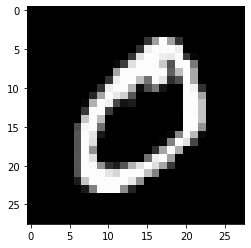



Final Output: 0


In [23]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [24]:
# Testing it with a real image




----------------Contoured Image--------------------


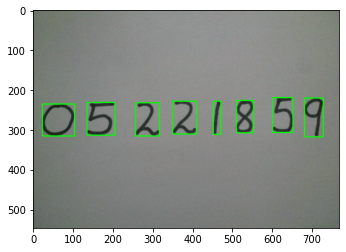

In [48]:
image = cv2.imread('./test_image.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [43]:
## getting the predicted numbers



---------------------------------------


=========PREDICTION============ 




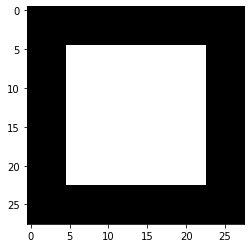



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




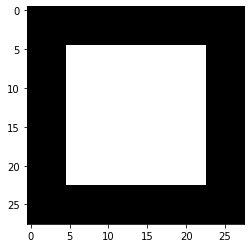



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




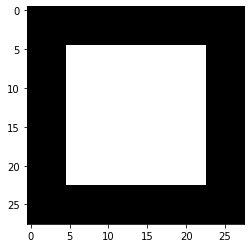



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




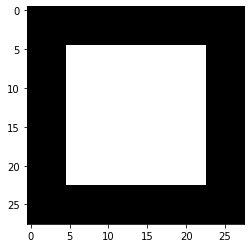



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




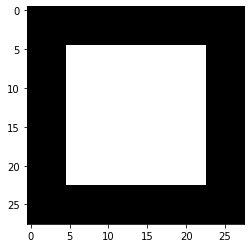



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




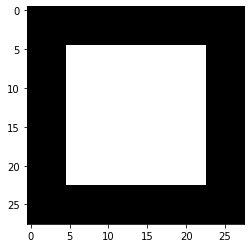



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




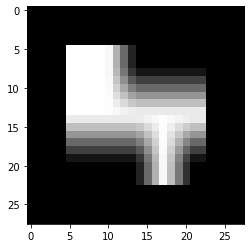



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.37740856 0.01016527 0.040294   0.007824   0.07359264 0.08247161
  0.2379865  0.00846508 0.11814351 0.04364882]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




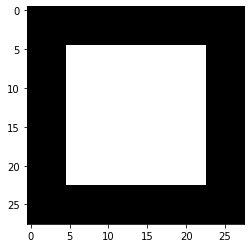



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




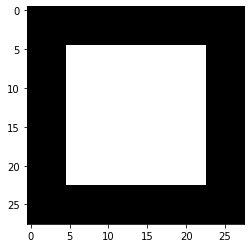



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




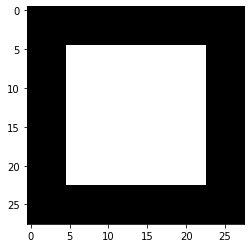



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




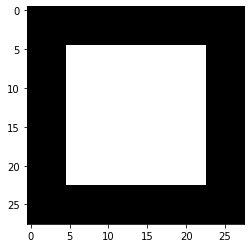



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




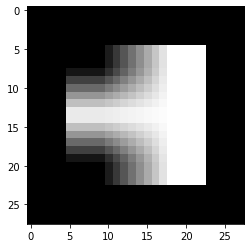



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.42568353 0.03096253 0.15348849 0.01859129 0.06584153 0.02421382
  0.14052725 0.0267768  0.08301367 0.03090111]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




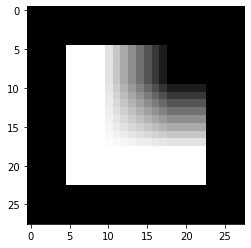



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.6417937e-01 3.9852114e-04 4.2044584e-02 1.8950226e-04 1.0214685e-03
  1.4992951e-03 7.8774266e-02 3.3604338e-05 1.1517370e-02 3.4205709e-04]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




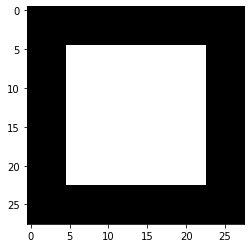



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




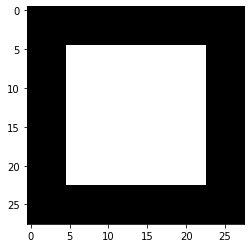



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




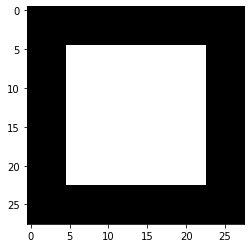



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




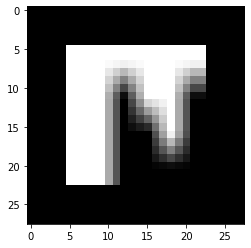



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.5511579  0.01342946 0.17839694 0.01489481 0.00712798 0.03280041
  0.06660687 0.00488022 0.10654301 0.0241624 ]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




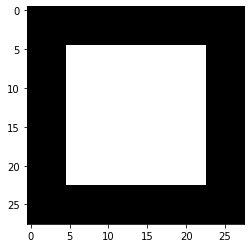



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




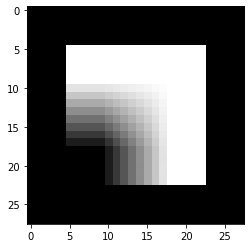



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.55673623 0.00513995 0.05997658 0.00522444 0.00777321 0.03011994
  0.1056828  0.00783436 0.20310447 0.01840799]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




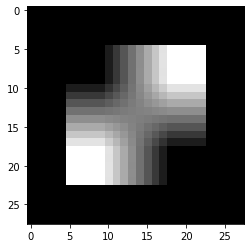



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0.20443603 0.01386376 0.48307574 0.02730872 0.04220057 0.01321389
  0.01795411 0.01837883 0.1356991  0.04386933]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




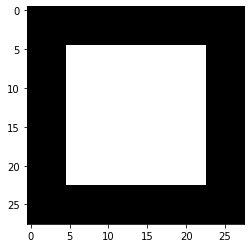



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




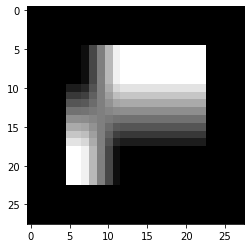



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0.15510304 0.0148575  0.5658415  0.03568829 0.02798248 0.01308569
  0.0108068  0.03301898 0.10743302 0.03618281]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




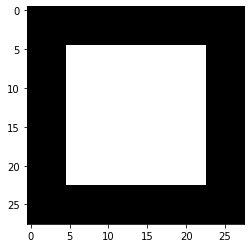



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




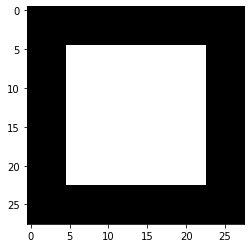



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




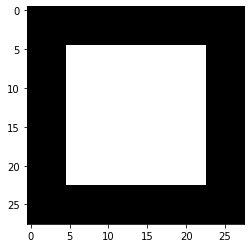



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




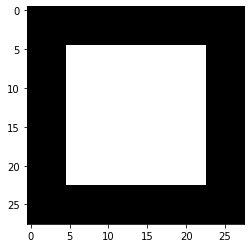



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




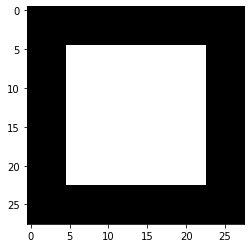



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




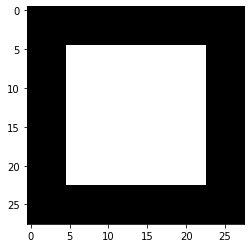



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




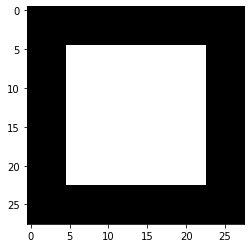



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




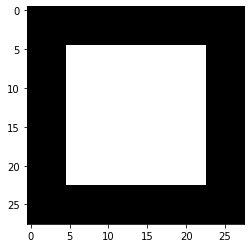



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




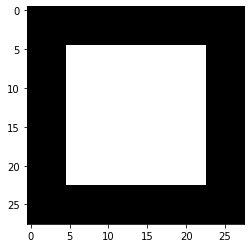



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




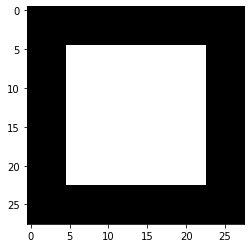



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




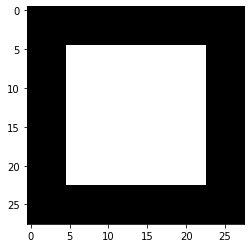



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




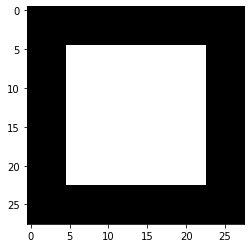



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




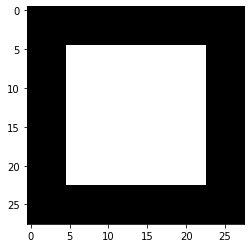



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




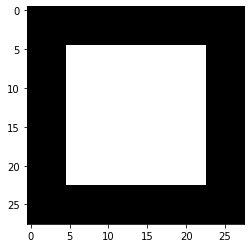



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




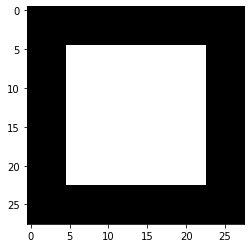



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




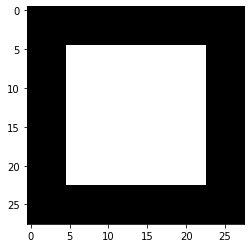



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




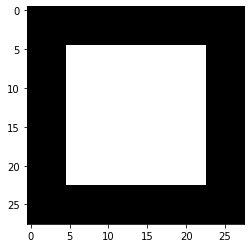



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




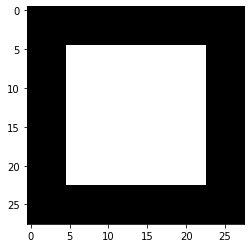



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




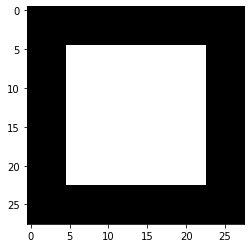



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




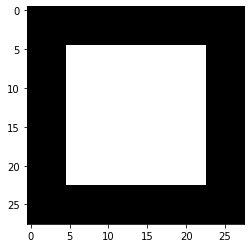



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




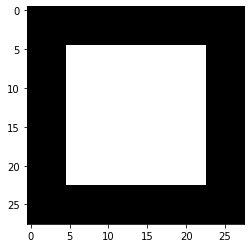



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




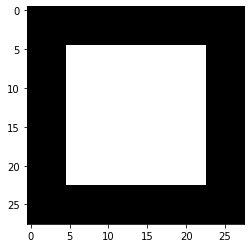



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




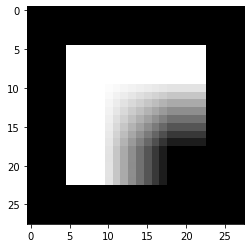



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.615315   0.0017927  0.18792401 0.00557842 0.00215544 0.00899819
  0.02261149 0.00234355 0.14186642 0.0114148 ]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




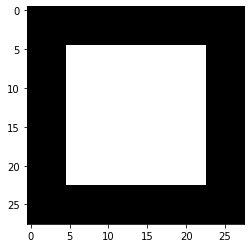



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




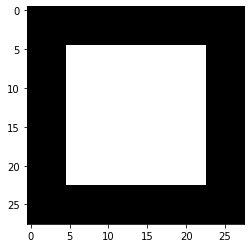



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




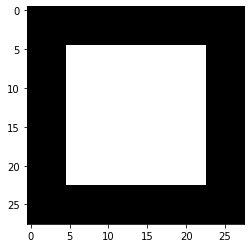



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




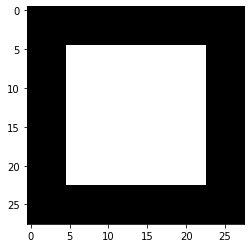



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




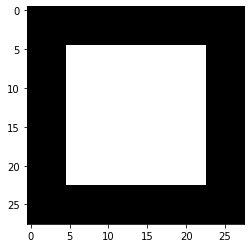



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




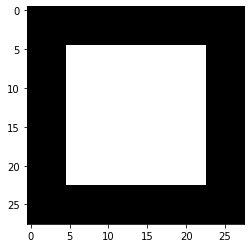



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




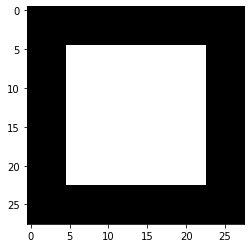



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




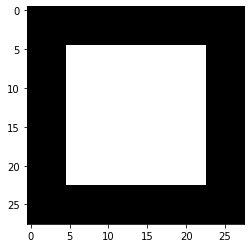



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




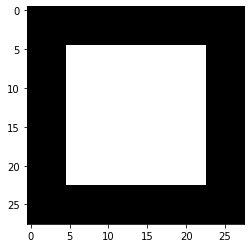



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




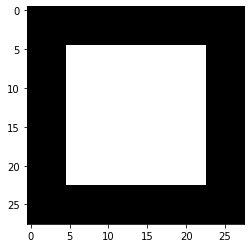



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




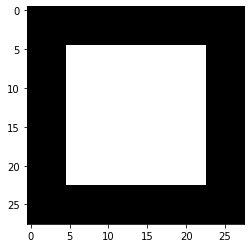



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




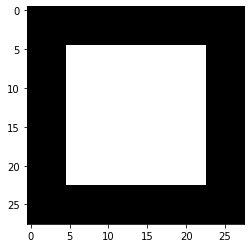



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




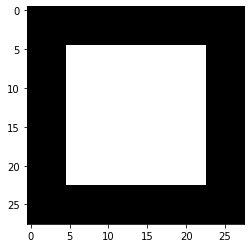



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




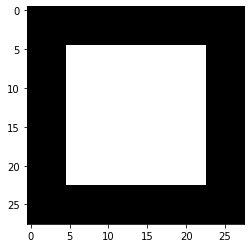



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




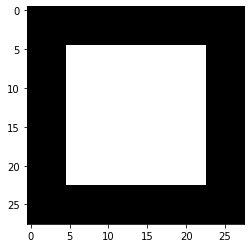



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.4471935e-01 6.5029884e-04 8.3981916e-02 5.4528902e-04 5.7186768e-04
  2.1686263e-03 2.6142161e-02 2.1087762e-04 3.9157078e-02 1.8525458e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




KeyboardInterrupt: 

In [47]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")